In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X=df.iloc[:,3:13]
y=df.iloc[:,-1]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
Geography=pd.get_dummies(X['Geography'],drop_first=True)
Gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
X=pd.concat([X,Geography,Gender],axis=1)

In [10]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [43]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [44]:
X_train.shape

(8000, 11)

In [45]:
from tensorflow import keras

In [46]:
model = keras.models.Sequential([
 
    keras.layers.Dense(6, activation="relu",kernel_initializer='he_uniform',input_shape=(11,)),
    keras.layers.Dense(6, activation="relu",kernel_initializer='he_uniform'),
    keras.layers.Dense(1, activation="sigmoid",kernel_initializer='glorot_uniform')
])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.layers

In [49]:
model.compile(loss="binary_crossentropy",
              optimizer="Adamax",
              metrics=["accuracy"])

In [50]:
history = model.fit(X_train,np.array(y_train), epochs=100,validation_split=0.33)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 206us/sample - loss: 1.0244 - accuracy: 0.4135 - val_loss: 0.8344 - val_accuracy: 0.4930
Epoch 2/100
5359/5359 [==============================] - 1s 136us/sample - loss: 0.7289 - accuracy: 0.5777 - val_loss: 0.6540 - val_accuracy: 0.6350
Epoch 3/100
5359/5359 [==============================] - 1s 143us/sample - loss: 0.6036 - accuracy: 0.6777 - val_loss: 0.5692 - val_accuracy: 0.7012
Epoch 4/100
5359/5359 [==============================] - 1s 137us/sample - loss: 0.5405 - accuracy: 0.7354 - val_loss: 0.5233 - val_accuracy: 0.7448
Epoch 5/100
5359/5359 [==============================] - 1s 143us/sample - loss: 0.5041 - accuracy: 0.7645 - val_loss: 0.4944 - val_accuracy: 0.7637
Epoch 6/100
5359/5359 [==============================] - 1s 146us/sample - loss: 0.4808 - accuracy: 0.7841 - val_loss: 0.4759 - val_accuracy: 0.7838
Epoch 7/100
5359/5359 [==============================] - 1

5359/5359 [==============================] - 1s 156us/sample - loss: 0.3548 - accuracy: 0.8515 - val_loss: 0.3775 - val_accuracy: 0.8410
Epoch 56/100
5359/5359 [==============================] - 1s 269us/sample - loss: 0.3545 - accuracy: 0.8526 - val_loss: 0.3773 - val_accuracy: 0.8417
Epoch 57/100
5359/5359 [==============================] - 2s 341us/sample - loss: 0.3543 - accuracy: 0.8518 - val_loss: 0.3772 - val_accuracy: 0.8413
Epoch 58/100
5359/5359 [==============================] - 1s 195us/sample - loss: 0.3541 - accuracy: 0.8528 - val_loss: 0.3771 - val_accuracy: 0.8410
Epoch 59/100
5359/5359 [==============================] - 1s 200us/sample - loss: 0.3538 - accuracy: 0.8520 - val_loss: 0.3770 - val_accuracy: 0.8425
Epoch 60/100
5359/5359 [==============================] - 1s 217us/sample - loss: 0.3536 - accuracy: 0.8526 - val_loss: 0.3769 - val_accuracy: 0.8413
Epoch 61/100
5359/5359 [==============================] - 1s 185us/sample - loss: 0.3533 - accuracy: 0.8518 - val

In [51]:
result=model.evaluate(X_test, np.array(y_test))
result

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3577617028951645, 0.8455]

In [52]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


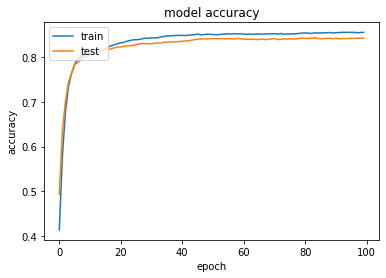

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

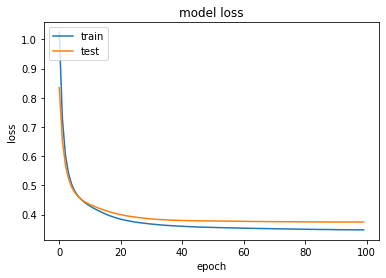

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

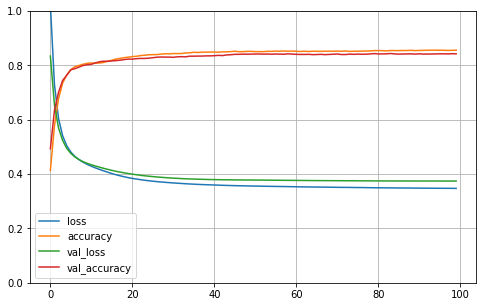

In [55]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [68]:
y_predicted = model.predict(X_test)
y_predicted[0]

array([0.32247305], dtype=float32)

In [69]:
y_predicted[:9]

array([[0.32247305],
       [0.39893773],
       [0.08232048],
       [0.07024857],
       [0.06664792],
       [0.86709064],
       [0.03571546],
       [0.14190555],
       [0.40401953]], dtype=float32)

In [63]:
y_pred = []
for element in y_predicted:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [30]:
import tensorflow as tf

In [73]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

In [74]:
cm

<tf.Tensor: id=155240, shape=(2, 2), dtype=int32, numpy=
array([[1506,   89],
       [ 220,  185]])>

Text(69.0, 0.5, 'Truth')

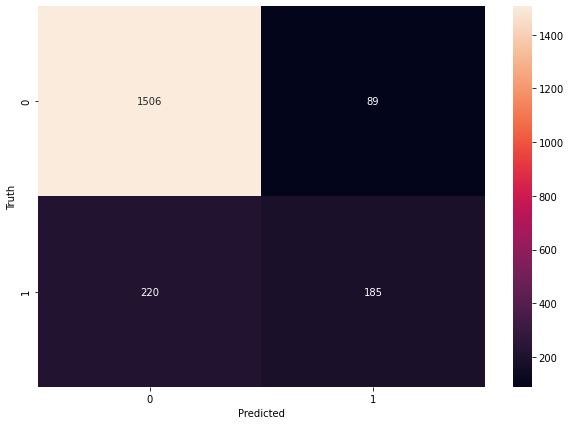

In [75]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
round((1506+185)/(1506+165+220+89),2)

0.85

In [71]:
round((1506)/(1506+220),2)

0.87

In [72]:
round((185)/(89+185),2)

0.68